Importing necessary libraries:

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

Generating the data.

In [14]:
number_data = 30
vector_x = np.linspace(0, 2 * np.pi, number_data)
vector_y = np.sin(vector_x) + 0.3 * (np.random.rand(number_data) - 0.5)
X_data = np.array([vector_x, vector_y]).T

Graphing the data

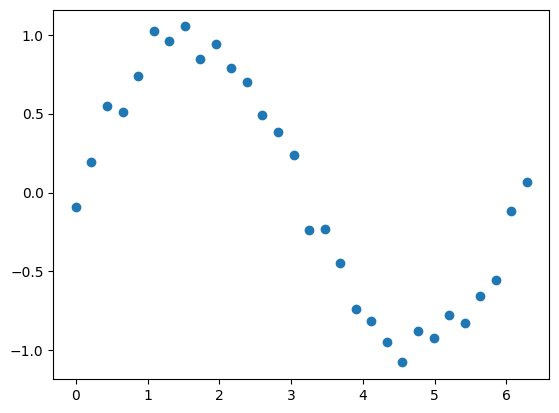

In [15]:
fig, ax = plt.subplots( )

ax.scatter(vector_x, vector_y)

plt.show()

## Creating Functions

We are going to create three different functions.
<ol>
<li>Linear Regression without any regularization.</li>
<li>Linear Regression using Ridge regularization.</li>
<li>Linear Regression using Lasso regularization.</li>
</ol>

Coefficients: 
[ 0.         -0.         -0.04692009  0.0069045 ]
Intercept: 
0.7249537648463976
Mean Squared Error: 
0.052910342781725905


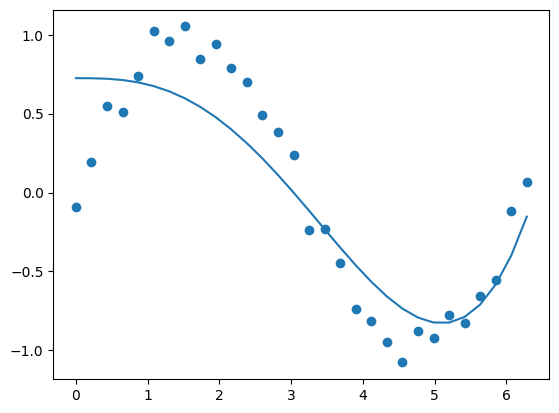

(0.052910342781725905,
 array([ 0.        , -0.        , -0.04692009,  0.0069045 ]),
 np.float64(0.7249537648463976),
 array([ 7.24953765e-01,  7.24491775e-01,  7.21379563e-01,  7.13301627e-01,
         6.98307616e-01,  6.74812329e-01,  6.41595712e-01,  5.97802865e-01,
         5.42944036e-01,  4.76894622e-01,  3.99895172e-01,  3.12551382e-01,
         2.15834102e-01,  1.11079328e-01, -1.17920999e-05, -1.15372961e-01,
        -2.32572731e-01, -3.48814506e-01, -4.60936538e-01, -5.65411929e-01,
        -6.58348635e-01, -7.35489456e-01, -7.92212047e-01, -8.23528912e-01,
        -8.24087403e-01, -7.88169724e-01, -7.09692930e-01, -5.82208922e-01,
        -3.98904457e-01, -1.52601137e-01]))

In [16]:
def concatenate_powers(data, n_power):
    data_x = data[:, 0]
    data_y = data[:, 1]
    new_data = [data_x]
    for k in range(2, n_power + 1):
        new_data.append(data_x * new_data[-1])

    new_data.append(data_y)
    return np.array(new_data).T

def linear_regression(data, to_graph=False):
    x_train, x_test, y_train, y_test = train_test_split(data[:,:-1],
                                                                data[:,-1],
                                                                random_state=42)
    # x_train = x_train.reshape((-1,1))
    # x_test = x_test.reshape((-1,1))


    reg = LinearRegression()
    reg.fit(x_train, y_train)
    y_test_predicted = reg.predict(x_test)

    mean_error = mean_squared_error(y_test, y_test_predicted)

    coefficients = reg.coef_
    intercept = reg.intercept_

    print("Coefficients: ")
    print(coefficients)
    print("Intercept: ")
    print(intercept)
    print("Mean Squared Error: ")
    print(mean_error)

    y_predicted = data[:, :-1] @ coefficients + intercept
    if to_graph:
        fig, ax = plt.subplots( )
        ax.scatter(data[:, 0], data[:, -1])
        ax.plot(data[:, 0], y_predicted)
        plt.show()

    return mean_error, coefficients, intercept, y_predicted


def linear_regression_ridge(data, alpha, to_graph=False):
    x_train, x_test, y_train, y_test = train_test_split(data[:,:-1],
                                                                data[:,-1],
                                                                random_state=42)
    # x_train = x_train.reshape((-1,1))
    # x_test = x_test.reshape((-1,1))


    reg = Ridge(alpha)
    reg.fit(x_train, y_train)
    y_test_predicted = reg.predict(x_test)

    mean_error = mean_squared_error(y_test, y_test_predicted)

    coefficients = reg.coef_
    intercept = reg.intercept_

    print("Coefficients: ")
    print(coefficients)
    print("Intercept: ")
    print(intercept)
    print("Mean Squared Error: ")
    print(mean_error)

    y_predicted = data[:, :-1] @ coefficients + intercept
    if to_graph:
        fig, ax = plt.subplots( )
        ax.scatter(data[:, 0], data[:, -1])
        ax.plot(data[:, 0], y_predicted)
        plt.show()

    return mean_error, coefficients, intercept, y_predicted


def linear_regression_lasso(data, alpha, to_graph=False):
    x_train, x_test, y_train, y_test = train_test_split(data[:,:-1],
                                                                data[:,-1],
                                                                random_state=42)
    # x_train = x_train.reshape((-1,1))
    # x_test = x_test.reshape((-1,1))


    reg = Lasso(alpha)
    reg.fit(x_train, y_train)
    y_test_predicted = reg.predict(x_test)

    mean_error = mean_squared_error(y_test, y_test_predicted)

    coefficients = reg.coef_
    intercept = reg.intercept_

    print("Coefficients: ")
    print(coefficients)
    print("Intercept: ")
    print(intercept)
    print("Mean Squared Error: ")
    print(mean_error)

    y_predicted = data[:, :-1] @ coefficients + intercept
    if to_graph:
        fig, ax = plt.subplots( )
        ax.scatter(data[:, 0], data[:, -1])
        ax.plot(data[:, 0], y_predicted)
        plt.show()

    return mean_error, coefficients, intercept, y_predicted

linear_regression_lasso(concatenate_powers(X_data, 4), 0.5, to_graph=True)